<a href="https://colab.research.google.com/github/scardenol/ai_2023/blob/main/cnn_style_transfer/src/cnn_fast_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data from [github repo](https://github.com/scardenol/ai_2023/tree/main/cnn_style_transfer) by url and store locally

In [1]:
# Read data from github repo by url
import urllib.request  # the lib that handles the url stuff

# Video
video_url = "https://github.com/scardenol/ai_2023/blob/main/cnn_style_transfer/data/1.%20input%20video/diving.mp4?raw=true"
video_name = "diving.mp4"
input_video = urllib.request.urlretrieve(video_url, video_name) # Store video locally

# Reference style image
image_url = "https://github.com/scardenol/ai_2023/blob/main/cnn_style_transfer/data/2.%20style%20image/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg?raw=true"
image_name = "Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg"
input_image = urllib.request.urlretrieve(image_url, image_name) # Store image locally

## Extract images or frames from video

In [2]:
import cv2
def get_frames(video_name):
  """
  Function to extract images or frames of a locally stored video.
  The frames per second (fps) and duration are automatiaclly detected.
  """
  cap = cv2.VideoCapture(video_name)
  images = []
  success,image = cap.read()
  images.append(image)
  count = 0
  while success:     
    success,image = cap.read()
    images.append(image)
    count += 1
  return images

def get_image(image_name):
  """
  Function to read an image stored locally.
  """
  cap = cv2.VideoCapture(image_name)
  _, image = cap.read()
  return image

In [3]:
images = get_frames(video_name)
style_image = get_image(image_name)

In [4]:
def convert_BGR_to_RGB(image):
  """
  Function that takes an image stored in BGR format (e.g. cv2) and converts
  it to RGB format (e.g. tensorflow).
  """
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Compare one image with the desired style to transfer

In [5]:
import numpy as np
import matplotlib.pyplot as plt

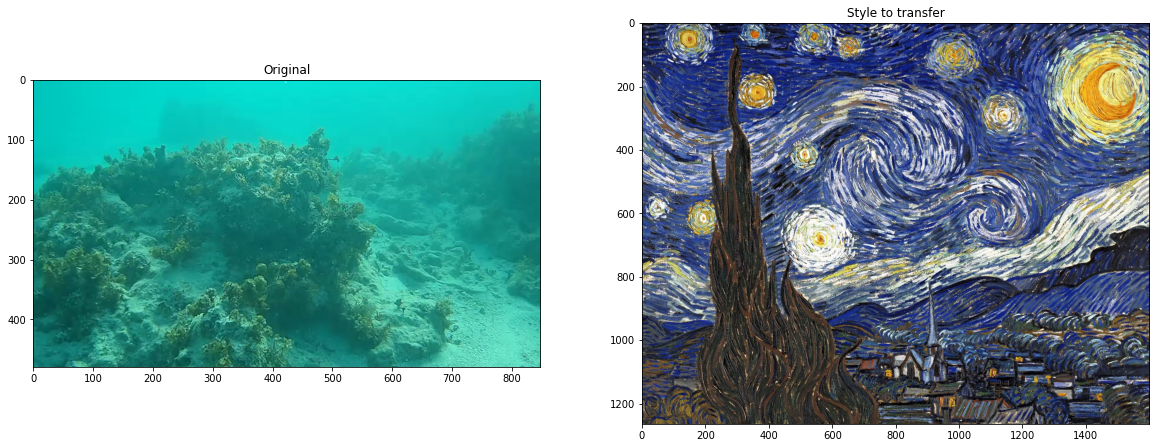

In [6]:
plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(convert_BGR_to_RGB(images[0]))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(convert_BGR_to_RGB(style_image));
plt.title("Style to transfer");

# Test if the fast style transfer doesn't suck

In [7]:
import os
import tensorflow as tf
# Fast style transfer (https://www.tensorflow.org/tutorials/generative/style_transfer)
import tensorflow_hub as hub
# Load compressed models from tensorflow_hub
#os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [8]:
def transfer_style(images, style_image):
  """
  Function that takes a list of images and applies a fast style transfer using
  tensorflow based on a reference style image. The output is a list of images.
  """
  # Load the fast style transfer model
  hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
  
  style_image = convert_BGR_to_RGB(style_image) # Convert image from BGR to RGB format
  tf_style_image = tf.convert_to_tensor(style_image, dtype=tf.float32) # Convert to a tensorflow tensor for the model
  
  # simulate the batch_size index, since in Keras and TensorFlow you can only make predictions on batches
  tf_style_image = tf.expand_dims(tf_style_image, axis=0)
  stylized_images = []
  for image in images:
    image = convert_BGR_to_RGB(image) # Convert image from BGR to RGB format
    tf_image = tf.convert_to_tensor(image, dtype=tf.float32) # Convert to a tensorflow tensor for the model
    tf_image = tf.expand_dims(tf_image, axis=0)
    stylized_image = hub_model(tf.constant(tf_image), tf.constant(tf_style_image))[0]
    stylized_images.append(stylized_image)
  return stylized_images

In [9]:
stylized_images = transfer_style(images[:10], style_image)

## Compare an original image vs the stylized result

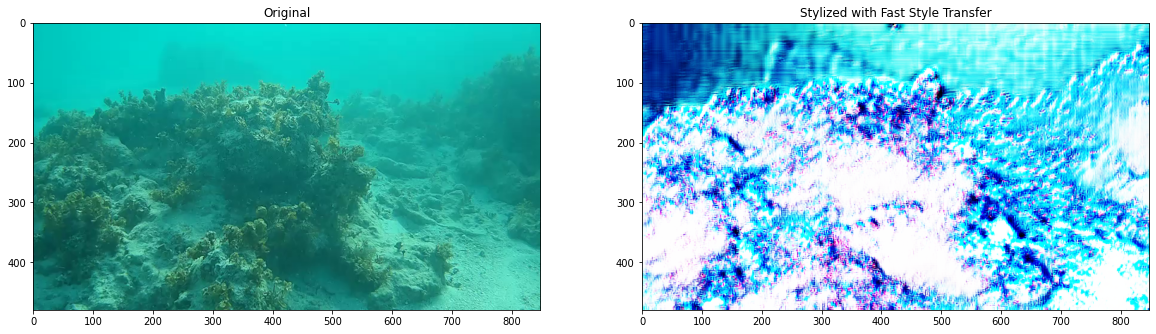

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(convert_BGR_to_RGB(images[0]))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(convert_BGR_to_RGB(np.squeeze(stylized_images[0])));
plt.title("Stylized with Fast Style Transfer");